In [49]:
from fastMONAI.vision_all import *

from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split
import pandas as pd

In [50]:
path = Path('..\data')
path.mkdir(exist_ok=True)

In [51]:
LiverSet = DecathlonDataset(root_dir=path, task="Task03_Liver", section="training", download=False,
                                 cache_num=0, num_workers=3)

In [52]:
df = pd.DataFrame(LiverSet.data)


In [53]:
df.head()

,image,label
0,..\data\Task03_Liver\imagesTr\liver_42.nii.gz,..\data\Task03_Liver\labelsTr\liver_42.nii.gz
1,..\data\Task03_Liver\imagesTr\liver_60.nii.gz,..\data\Task03_Liver\labelsTr\liver_60.nii.gz
2,..\data\Task03_Liver\imagesTr\liver_97.nii.gz,..\data\Task03_Liver\labelsTr\liver_97.nii.gz
3,..\data\Task03_Liver\imagesTr\liver_1.nii.gz,..\data\Task03_Liver\labelsTr\liver_1.nii.gz
4,..\data\Task03_Liver\imagesTr\liver_87.nii.gz,..\data\Task03_Liver\labelsTr\liver_87.nii.gz


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   105 non-null    object
 1   label   105 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [55]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((94, 2), (11, 2))

In [56]:
med_dataset = MedDataset(img_list=train_df.label.tolist()[:20], dtype=MedMask, max_workers=12)

In [57]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1,voxel_count_2
0,..\data\Task03_Liver\labelsTr\liver_95.nii.gz,512,512,841,0.7380,0.7380,0.8,RAS+,216392406,4068117,2581.0
1,..\data\Task03_Liver\labelsTr\liver_41.nii.gz,512,512,113,1.0000,1.0000,1.0,RAS+,27988631,1633641,NaN
2,..\data\Task03_Liver\labelsTr\liver_67.nii.gz,512,512,165,0.7109,0.7109,2.5,RAS+,42151301,1101934,525.0
3,..\data\Task03_Liver\labelsTr\liver_31.nii.gz,512,512,91,1.0000,1.0000,1.0,RAS+,22722672,1125696,6736.0
4,..\data\Task03_Liver\labelsTr\liver_87.nii.gz,512,512,896,0.8540,0.8540,0.8,RAS+,230972402,3908622,NaN


In [58]:
summary_df = med_dataset.summary()

In [59]:
summary_df

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,512,512,91,1.0000,1.0000,1.000,RAS+,..\data\Task03_Liver\labelsTr\liver_31.nii.gz,1
1,512,512,94,0.5566,0.5566,5.000,RAS+,..\data\Task03_Liver\labelsTr\liver_71.nii.gz,1
18,512,512,861,0.7383,0.7383,0.700,RAS+,..\data\Task03_Liver\labelsTr\liver_27.nii.gz,1
17,512,512,841,0.7380,0.7380,0.800,RAS+,..\data\Task03_Liver\labelsTr\liver_95.nii.gz,1
16,512,512,816,0.7200,0.7200,0.800,RAS+,..\data\Task03_Liver\labelsTr\liver_110.nii.gz,1
15,512,512,761,0.7820,0.7820,0.800,RAS+,..\data\Task03_Liver\labelsTr\liver_111.nii.gz,1
14,512,512,677,0.7168,0.7168,0.700,RAS+,..\data\Task03_Liver\labelsTr\liver_102.nii.gz,1
13,512,512,647,0.6836,0.6836,0.700,RAS+,..\data\Task03_Liver\labelsTr\liver_86.nii.gz,1
12,512,512,645,0.7344,0.7344,0.700,RAS+,..\data\Task03_Liver\labelsTr\liver_98.nii.gz,1
11,512,512,565,0.6543,0.6543,1.000,RAS+,..\data\Task03_Liver\labelsTr\liver_15.nii.gz,1


In [60]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([1.0, 1.0, 1.0], False)

In [61]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[512.0, 512.0, 717.0]

In [82]:
item_tfms = [ZNormalization(), PadOrCrop([128,256,480]), RandomAffine(scales=0, degrees=5, isotropic=True)] 

In [83]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(seed=42),
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      batch_tfms=None,
                      reorder=reorder,
                      resample=resample)

In [84]:
bs=1
dls = dblock.dataloaders(train_df, bs=bs)

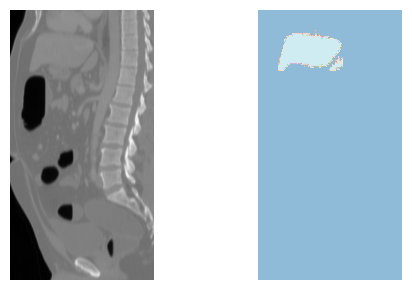

In [81]:
dls.show_batch(anatomical_plane=0, unique=True)

In [85]:
len(dls.train_ds.items), len(dls.valid_ds.items)

(76, 18)

In [86]:
from monai.networks.nets import UNet
from monai.losses import DiceCELoss

In [87]:
codes = np.unique(med_img_reader(train_df.label.tolist()[0]))
n_classes = len(codes)

In [88]:
codes, n_classes

(array([0., 1., 2.], dtype=float32), 3)

In [89]:
model = UNet(dimensions=3, in_channels=1, out_channels=n_classes, 
             channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), 
             num_res_units=2)

C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\monai\utils\deprecate_utils.py:219: FutureWarning: monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.
  warn_deprecated(argname, msg, warning_category)


In [90]:
loss_func = CustomLoss(loss_func=DiceCELoss(to_onehot_y=True, include_background=True, softmax=True))

In [91]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=multi_dice_score)

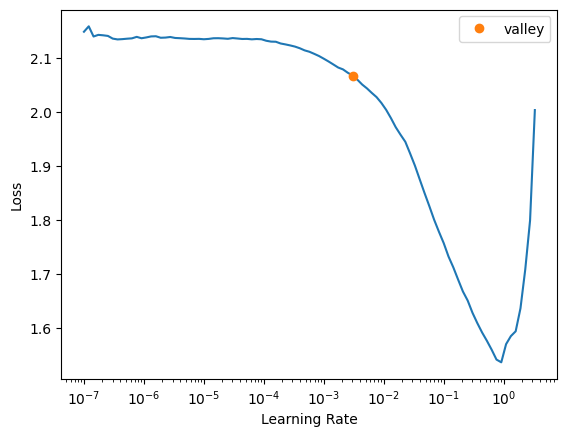

In [92]:
lr = learn.lr_find()#.to_fp16()

In [93]:
epochs = 4

In [94]:
learn.fit_flat_cos(epochs, lr)

epoch,train_loss,valid_loss,multi_dice_score,time
0,1.435738,1.038501,"tensor([0.0133, nan])",16:56
1,0.920383,0.735600,"tensor([0.4160, nan])",17:18
2,0.709303,0.629454,"tensor([0.5464, nan])",17:01
3,0.590427,0.509414,"tensor([0.7570, nan])",16:58


C:\Users\Eirik\anaconda3\envs\raskmonai\lib\site-packages\fastMONAI\vision_metrics.py:49: RuntimeWarning: Mean of empty slice
  binary_dice_scores.append(np.nanmean(dsc)) #TODO update torch to get torch.nanmean() to work


In [97]:
learn.save('baseline.liver-model')

Path('models/baseline.liver-model.pth')

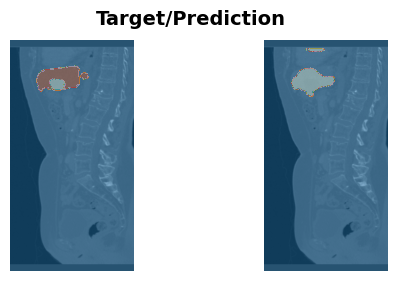

In [98]:
learn.show_results(anatomical_plane=0, ds_idx=1)

In [99]:
test_dl = learn.dls.test_dl(test_df,with_labels=True)

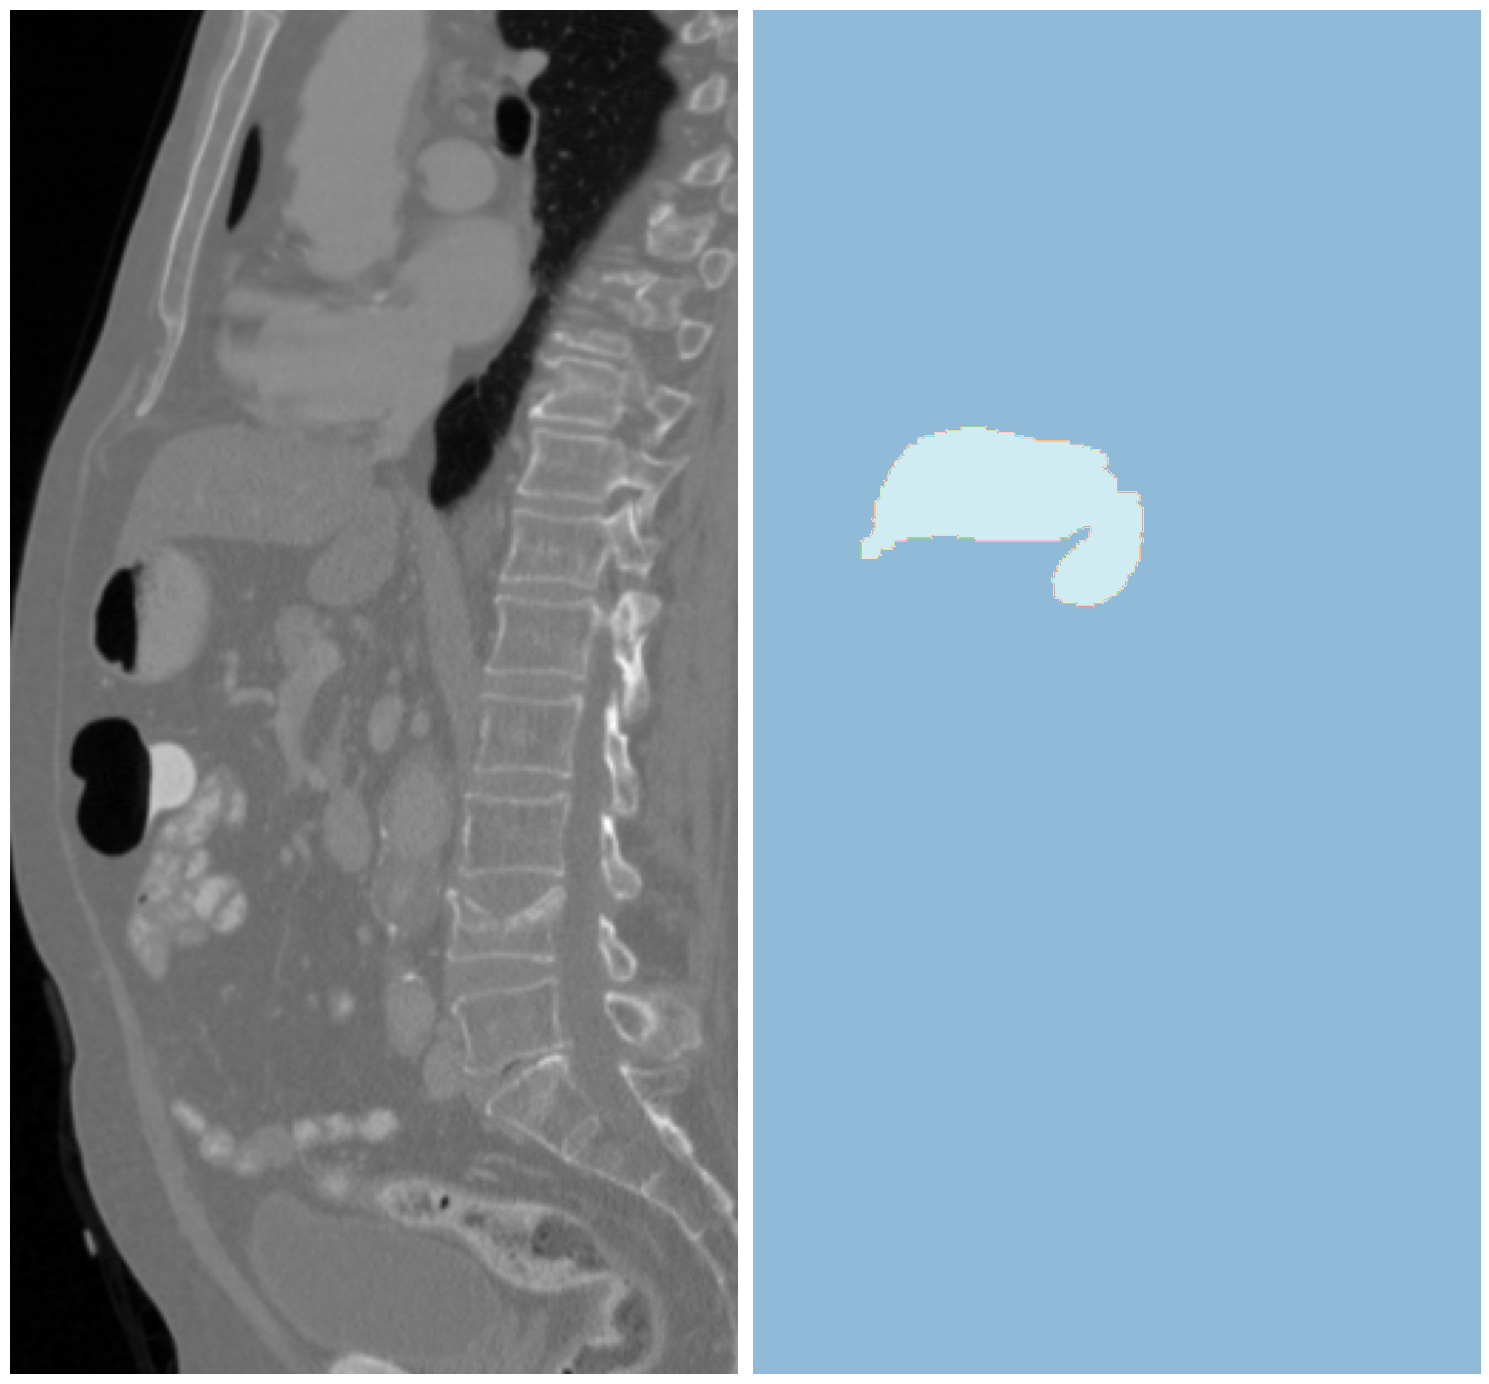

In [100]:
test_dl.show_batch(anatomical_plane=0, figsize=(15,15))

In [101]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([11, 3, 128, 256, 480]), torch.Size([11, 1, 128, 256, 480]))

In [102]:
multi_dice_score(pred_acts, labels)

tensor([0.6951, 0.0000])

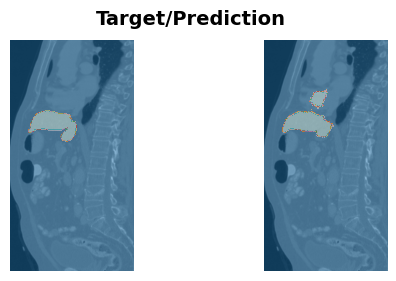

In [104]:
learn.show_results(anatomical_plane=0, dl=test_dl, ds_idx=19)

In [105]:
learn.export('baseline_Liver.pkl')